In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import os
os.chdir('/Users/fabianjp/Documents/NYU/Fall 2021/Introduction to Data Science/Projects')
import pandas as pd
from scipy import stats
alpha = 0.005

def tutest(x, y): #x = array of data 1, y=array of data 2. It returns the estimates col(mean,sd,n,sem), the t and p statistics and u and pu statistics
    t,p = stats.ttest_ind(x,y)
    xy = [x,y]
    estimates = np.empty([2,5])
    estimates[:] = np.NaN 
    for ii in range(2):
        estimates[ii,0] = np.mean(xy[ii]) # mu
        estimates[ii,1] = np.std(xy[ii]) # sigma
        estimates[ii,2] = len(xy[ii]) # n
        estimates[ii,3] = estimates[ii,1]/np.sqrt(estimates[ii,2]) # sem
        estimates[ii,4] = np.median(xy[ii])
    plt.hist(x)    
    plt.hist(y) 
    #Calculationg effect size d (Cohen's d) d = (u1-u2)/s
    df = estimates[0,2] + estimates[1,2] - 2
    #Where s = sqrt(((n1 - 1) * s1^2 + (n2 - 1) * s2^2) / (n1 + n2 - 2))
    s = np.sqrt(((estimates[0,2] - 1) * estimates[0,1]**2 + (estimates[1,2] - 1) * estimates[1,1]**2) / (estimates[0,2] + estimates[1,2] - 2))
    d = (estimates[0,0]-estimates[1,0])/s #D taking x vs y
    print('t = {:.3f}'.format(t),', p = {:.3f}'.format(p), ', d = {:.3f}'.format(d), ', df = {:.0f}'.format(df))
    #We could also have done a Mann-Whitney U test to analyze the medians.
    u,pu = stats.mannwhitneyu(x,y)
    print('u = {:.3f}'.format(u),', p = {:.3f}'.format(pu), ', d = {:.3f}'.format(d))
    return t,p,u,pu,d,df,estimates
def tutest2(x,y):
    t,p,u,pu,d,df,estimates = tutest(x,y)
    return t,p,u,pu,d,df

[[2.15131579e+00 3.15342163e+00 1.15854871e+00 ... 4.53000000e+02
  1.32894651e-01 4.30088248e-02]
 [2.02112676e+00 2.70761246e+00 1.13347471e+00 ... 2.89000000e+02
  1.34518700e-01 6.77214215e-02]
 [2.59765625e+00 2.77861771e+00 1.01561749e+00 ... 4.63000000e+02
  8.97687516e-02 4.21060138e-02]
 ...
 [2.40229885e+00 2.61895161e+00 9.99537481e-01 ... 4.96000000e+02
  7.57747409e-02 4.72816370e-02]
 [2.11475410e+00 3.27245863e+00 1.11764331e+00 ... 8.46000000e+02
  1.43099563e-01 3.00768382e-02]
 [2.33796296e+00 2.29545455e+00 1.14023370e+00 ... 1.98000000e+02
  1.09719039e-01 8.18222204e-02]]
t = 17.822 , p = 0.000 , d = 1.780
u = 35404.000 , p = 0.000 , d = 1.780


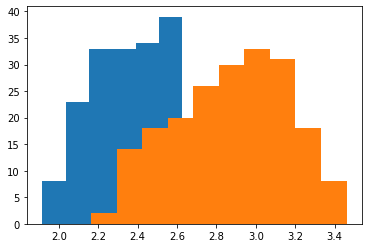

In [3]:
#Question 1
data = np.genfromtxt('movieReplicationSet.csv', delimiter = ',', skip_header = 1)
dataratings = data[:,0:400]
dataratings1 = [None] * 400
remove = [None] * 1097
for ii in range(400): #create a transpose data set without the NA's
    remove = dataratings[:,ii]
    dataratings1[ii] = remove[np.isfinite(remove)]
ratings = [None] * 400
for ii in range(400): #Calculate the number of valid ratings each movie has
    ratings[ii] = len(dataratings1[ii])

#media = [None]*400
#for ii in range(400): #Calculater means of the movies
#    media[ii] = np.mean(dataratings1[ii]) 


median_rating = np.median(ratings)
h_rated = [None] * 200
l_rated = [None] * 200
x = 0
y = 0
for ii in range(400): #Separate the movies in those who have more ratings and fewer ratings using the the median as a comparative threshold
    if ratings[ii] <= median_rating:
        l_rated[x] = dataratings1[ii]
        x = x + 1
    else:
        h_rated[y] = dataratings1[ii]
        y = y + 1
        
estimates = np.empty([200,8]) # Create a frame containing each sample characteristics
estimates[:] = np.NaN 
for ii in range(200):
    estimates[ii,0] = np.mean(l_rated[ii]) # median
    estimates[ii,1] = np.mean(h_rated[ii]) # median
    estimates[ii,2] = np.std(l_rated[ii]) # sigma
    estimates[ii,3] = np.std(h_rated[ii]) # sigma
    estimates[ii,4] = len(l_rated[ii]) # n
    estimates[ii,5] = len(h_rated[ii]) # n
    estimates[ii,6] = estimates[ii,2]/np.sqrt(estimates[ii,4]) # sem
    estimates[ii,7] = estimates[ii,3]/np.sqrt(estimates[ii,5]) # sem
print(estimates)
       
plt.hist(estimates[:,0])    
plt.hist(estimates[:,1])
descriptives = np.empty([2,4])
descriptives[:] = np.NaN
descriptives[0,0] = np.mean(estimates[:,0])
descriptives[1,0] = np.mean(estimates[:,1])
descriptives[0,1] = np.std(estimates[:,0])
descriptives[1,1] = np.std(estimates[:,1])
s = np.sqrt(((200 - 1) * descriptives[0,1]**2 + (200 - 1) * descriptives[1,1]**2) / (200 + 200 - 2))
d = (descriptives[1,0]-descriptives[0,0])/s #D taking high vs low
t,p = stats.ttest_rel(estimates[:,1],estimates[:,0],alternative="greater")
print('t = {:.3f}'.format(t),', p = {:.3f}'.format(p), ', d = {:.3f}'.format(d))
u,pu = stats.mannwhitneyu(estimates[:,1],estimates[:,0],alternative="greater")
print('u = {:.3f}'.format(u),', p = {:.3f}'.format(pu), ', d = {:.3f}'.format(d))
#We can state that more popular movies are rated higher than the less popular ones.
#Plot the means

Text(0.5, 1.0, 't = 17.822, p = 0.000')

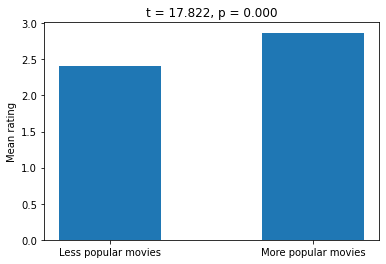

In [4]:
x = ['Less popular movies', 'More popular movies'] # labels for the bars
xPos = np.array([1,2]) # x-values for the bars
plt.bar(xPos,descriptives[:,0],width=0.5,yerr=descriptives[:,3]) # bars + error  
plt.xticks(xPos, x) # label the x_pos with the labels
plt.ylabel('Mean rating') # add y-label
plt.title('t = {:.3f}'.format(t) + ', p = {:.3f}'.format(p))

85.3% of only childs and 86.8% of siblings have seen Lion King
t = -2.054 , p = 0.040 , d = -0.183 , df = 925
u = 52929.000 , p = 0.022 , d = -0.183
t = -2.054 , p = 0.980 , d = -0.183 , df = 925
u = 52929.000 , p = 0.978 , d = -0.183


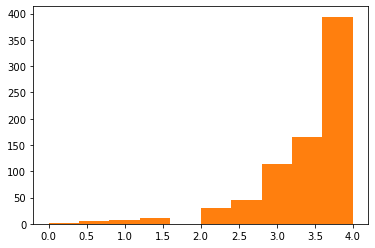

In [5]:
data1 = pd.read_csv('movieReplicationSet.csv',skipinitialspace=True)
lionk = data1['The Lion King (1994)'] # Extract Lion King
siblings = data1['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] #Extract only child
oc = np.empty(0) #only child ratings
noc = np.empty(0)#not only child ratings
#assign female and male ratings
for ii in range(len(lionk)):
    if siblings[ii] == 1:
        oc = np.append(oc, lionk[ii])
    elif siblings[ii] == 0:
        noc = np.append(noc, lionk[ii])
#We see there are 177 only childs and 894 persons with siblings
#now we eliminate NaN
for ii in range(len(oc)): 
    oc = oc[np.isfinite(oc)]
for ii in range(len(noc)): 
    noc = noc[np.isfinite(noc)]
#151 only childs who have seen lion king and 775 persons with siblings
print('{:.1f}% of only childs and'.format(len(oc)/177*100),'{:.1f}% of siblings have seen Lion King'.format(len(noc)/894*100))
t,p,u,pu,d,df,estimates = tutest(oc,noc)
u,pu = stats.mannwhitneyu(oc,noc,alternative="greater")
t,p = stats.ttest_ind(oc,noc, alternative="greater")
print('t = {:.3f}'.format(t),', p = {:.3f}'.format(p), ', d = {:.3f}'.format(d), ', df = {:.0f}'.format(df))
print('u = {:.3f}'.format(u),', p = {:.3f}'.format(pu), ', d = {:.3f}'.format(d))
#the result is not significant

58.4% of social watchers and 64.4% of alone watchers have seen the Wolf of Walstreet
t = -1.568 , p = 0.117 , d = -0.124 , df = 661
u = 49303.500 , p = 0.056 , d = -0.124
t = -1.568 , p = 0.941 , d = -0.124 , df = 661
u = 49303.500 , p = 0.944 , d = -0.124


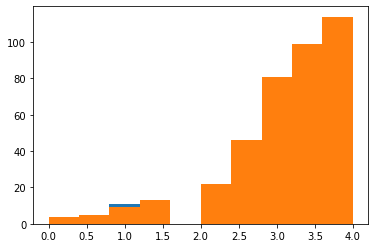

In [6]:
#Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?
data1 = pd.read_csv('movieReplicationSet.csv',skipinitialspace=True)
wolf = data1['The Wolf of Wall Street (2013)'] # Extract The Wolf of Walstreet
sosalo = data1['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] #Extract social aspect
social = np.empty(0) #social watching ratings
alone = np.empty(0)#alone watching ratings
#assign social and alone ratings
for ii in range(len(wolf)):
    if sosalo[ii] == 0:
        social = np.append(social, wolf[ii])
    elif sosalo[ii] == 1:
        alone = np.append(alone, wolf[ii])
#We see there are 462 social watchers and 610 alone watchers
#now we eliminate NaN
for ii in range(len(social)): 
    social = social[np.isfinite(social)]
for ii in range(len(alone)): 
    alone = alone[np.isfinite(alone)]
#270 social watchers who have seen The Wolf of Walstreet and 393 alone watchers
print('{:.1f}% of social watchers and'.format(len(social)/462*100),'{:.1f}% of alone watchers have seen the Wolf of Walstreet'.format(len(alone)/610*100))
t,p,u,pu,d,df,estimates = tutest(social,alone)
u,pu = stats.mannwhitneyu(social,alone,alternative="greater")
t,p = stats.ttest_ind(social,alone, alternative="greater")
print('t = {:.3f}'.format(t),', p = {:.3f}'.format(p), ', d = {:.3f}'.format(d), ', df = {:.0f}'.format(df))
print('u = {:.3f}'.format(u),', p = {:.3f}'.format(pu), ', d = {:.3f}'.format(d))
#The result is not significant

t = 1.283 , p = 0.204 , d = 0.307 , df = 70
u = 542.000 , p = 0.116 , d = 0.307
t = 1.648 , p = 0.104 , d = 0.407 , df = 66
u = 447.000 , p = 0.058 , d = 0.407
t = 0.896 , p = 0.371 , d = 0.087 , df = 437
u = 21615.000 , p = 0.114 , d = 0.087
t = -0.806 , p = 0.421 , d = -0.098 , df = 279
u = 8945.500 , p = 0.182 , d = -0.098
t = 0.544 , p = 0.587 , d = 0.052 , df = 446
u = 23311.500 , p = 0.160 , d = 0.052
t = -0.271 , p = 0.787 , d = -0.049 , df = 121
u = 1699.500 , p = 0.183 , d = -0.049
t = 0.607 , p = 0.545 , d = 0.093 , df = 172
u = 3472.000 , p = 0.203 , d = 0.093
t = 0.335 , p = 0.738 , d = 0.044 , df = 242
u = 7109.000 , p = 0.402 , d = 0.044
t = -0.621 , p = 0.536 , d = -0.111 , df = 128
u = 1872.000 , p = 0.171 , d = -0.111
t = -0.425 , p = 0.671 , d = -0.036 , df = 569
u = 38481.500 , p = 0.274 , d = -0.036
t = -0.245 , p = 0.807 , d = -0.025 , df = 392
u = 18574.500 , p = 0.245 , d = -0.025
t = -1.661 , p = 0.099 , d = -0.290 , df = 137
u = 1990.000 , p = 0.082 , d = -0.29

t = -0.825 , p = 0.411 , d = -0.141 , df = 138
u = 2253.500 , p = 0.209 , d = -0.141
t = 0.430 , p = 0.667 , d = 0.031 , df = 772
u = 70810.000 , p = 0.236 , d = 0.031
t = -0.283 , p = 0.778 , d = -0.045 , df = 160
u = 3142.500 , p = 0.326 , d = -0.045
t = -0.236 , p = 0.814 , d = -0.050 , df = 90
u = 1041.500 , p = 0.464 , d = -0.050
t = -0.145 , p = 0.885 , d = -0.034 , df = 74
u = 711.500 , p = 0.466 , d = -0.034
t = -0.379 , p = 0.705 , d = -0.070 , df = 122
u = 1757.500 , p = 0.313 , d = -0.070
t = 0.051 , p = 0.960 , d = 0.011 , df = 83
u = 842.500 , p = 0.446 , d = 0.011
t = -0.044 , p = 0.965 , d = -0.012 , df = 54
u = 386.000 , p = 0.493 , d = -0.012
t = -1.304 , p = 0.193 , d = -0.143 , df = 347
u = 14037.500 , p = 0.258 , d = -0.143
t = 0.802 , p = 0.425 , d = 0.190 , df = 71
u = 608.500 , p = 0.262 , d = 0.190
t = 2.345 , p = 0.019 , d = 0.194 , df = 598
u = 39146.000 , p = 0.007 , d = 0.194
t = -2.602 , p = 0.010 , d = -0.256 , df = 445
u = 19748.500 , p = 0.003 , d = -0.2

t = -1.326 , p = 0.186 , d = -0.185 , df = 213
u = 4999.000 , p = 0.095 , d = -0.185
t = -0.795 , p = 0.427 , d = -0.104 , df = 242
u = 6886.500 , p = 0.266 , d = -0.104
t = 1.303 , p = 0.193 , d = 0.118 , df = 492
u = 27367.500 , p = 0.033 , d = 0.118
t = -0.236 , p = 0.814 , d = -0.038 , df = 162
u = 3233.500 , p = 0.460 , d = -0.038
t = -0.719 , p = 0.473 , d = -0.105 , df = 191
u = 4337.000 , p = 0.286 , d = -0.105
t = -1.635 , p = 0.103 , d = -0.171 , df = 384
u = 17154.000 , p = 0.253 , d = -0.171
t = 0.525 , p = 0.600 , d = 0.086 , df = 156
u = 2771.000 , p = 0.231 , d = 0.086
t = 0.867 , p = 0.386 , d = 0.108 , df = 263
u = 8030.500 , p = 0.197 , d = 0.108
t = 1.046 , p = 0.296 , d = 0.099 , df = 460
u = 23844.500 , p = 0.076 , d = 0.099
t = 1.441 , p = 0.151 , d = 0.222 , df = 173
u = 3282.000 , p = 0.083 , d = 0.222
t = 0.413 , p = 0.680 , d = 0.042 , df = 393
u = 18328.500 , p = 0.289 , d = 0.042
t = 2.439 , p = 0.015 , d = 0.161 , df = 926
u = 97618.000 , p = 0.012 , d = 0.

t = 0.930 , p = 0.353 , d = 0.104 , df = 331
u = 12500.500 , p = 0.147 , d = 0.104
t = -0.779 , p = 0.437 , d = -0.091 , df = 297
u = 10624.500 , p = 0.273 , d = -0.091
t = 0.160 , p = 0.873 , d = 0.014 , df = 556
u = 37899.500 , p = 0.444 , d = 0.014
t = 0.984 , p = 0.326 , d = 0.084 , df = 555
u = 36774.500 , p = 0.196 , d = 0.084
t = 0.773 , p = 0.441 , d = 0.146 , df = 112
u = 1477.000 , p = 0.207 , d = 0.146
t = -1.071 , p = 0.286 , d = -0.165 , df = 176
u = 3501.000 , p = 0.186 , d = -0.165
t = 0.519 , p = 0.604 , d = 0.047 , df = 496
u = 29524.500 , p = 0.290 , d = 0.047
t = 0.047 , p = 0.963 , d = 0.007 , df = 178
u = 3853.000 , p = 0.459 , d = 0.007
t = -0.289 , p = 0.773 , d = -0.044 , df = 178
u = 3958.000 , p = 0.452 , d = -0.044
t = -0.281 , p = 0.780 , d = -0.056 , df = 103
u = 1334.500 , p = 0.415 , d = -0.056
t = 0.249 , p = 0.804 , d = 0.061 , df = 66
u = 569.500 , p = 0.463 , d = 0.061
t = -1.610 , p = 0.109 , d = -0.235 , df = 189
u = 4122.000 , p = 0.131 , d = -0.23

(array([2., 5., 0., 0., 0., 4., 2., 0., 0., 1.]),
 array([-0.43596333, -0.3201995 , -0.20443567, -0.08867183,  0.027092  ,
         0.14285583,  0.25861966,  0.37438349,  0.49014732,  0.60591115,
         0.72167499]),
 <BarContainer object of 10 artists>)

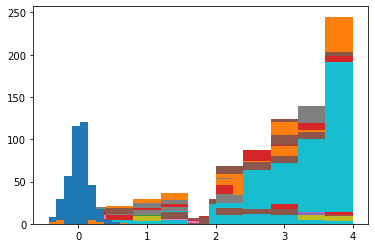

In [7]:
data1 = pd.read_csv('movieReplicationSet.csv',skipinitialspace=True)
data = data1.values[:,0:400] # Extract movies
sosalo = data1['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] #Extract social
social = np.empty([462,400])
alone = np.empty([610,400])
social[:] = np.NaN
alone[:] = np.NaN
i = 0
j = 0
#assign only child and not only child ratings
for ii in range(len(data)):
    if sosalo[ii] == 0:
        social[i] = data[ii]
        i = i + 1
    elif sosalo[ii] == 1:
        alone[j] = data[ii]
        j = j + 1
#Now I eliminate the NaN (mmoc, mnoc) 
msocial = [None] * 400
malone = [None] * 400
remove = [None] * len(msocial)
remove2 = [None] *len(malone)
for ii in range(400): #create a transpose data set without the NA's
    remove = social[:,ii]
    msocial[ii] = remove[np.isfinite(remove)]
    remove2 = alone[:,ii]
    malone[ii] = remove2[np.isfinite(remove2)]

#Extract the movie titles to see which ones are significant
titles = np.empty([400,2])
titles = data1.columns.values #extract the column labels
titles = titles[0:400] #Keep only the movie labels
stitles = np.empty([15,1])
stitles = titles[0:14]
#Now I create the matrix that will store the t test, u test and effect size values.
testmatrix = pd.DataFrame(np.empty([400,6])) #t,p,u,pu,d,df
significant = 0
fhigher = 0
sigmatrix = np.empty([14,6])
#Start the 400 tests
for ii in range(400):
    testmatrix.iloc[ii] = tutest2(msocial[ii],malone[ii])
    if (testmatrix.iloc[ii,1] < alpha) or (testmatrix.iloc[ii,3] < alpha):
        sigmatrix[significant] = testmatrix.iloc[ii]
        stitles[significant] = titles[ii]
        significant = significant + 1
        if testmatrix.iloc[ii,4] < 0:
            fhigher = fhigher + 1
#The testmatrix contains 400 movie tests between males and females ratings.
#Each column represents: 0 = ttest value, 1 = p-value, 2, U-test, 3 = p-value, 4 = effect size, 5 = degrees of freedom
plt.hist(testmatrix[4]) #Plot effect sizes of all results and then the significant results        
plt.hist(sigmatrix[:,4])

In [8]:
sigmatrix

array([[-3.03057073e+00,  2.56946469e-03,  2.43445000e+04,
         2.77164978e-04, -2.77710301e-01,  4.92000000e+02],
       [ 3.05738577e+00,  3.13273519e-03,  4.23000000e+02,
         2.34784268e-03,  7.21674986e-01,  7.20000000e+01],
       [-2.28649209e+00,  2.27189149e-02,  1.81970000e+04,
         2.49910153e-03, -2.27392847e-01,  4.23000000e+02],
       [ 3.34686304e+00,  8.49614325e-04,  9.47880000e+04,
         1.39808376e-04,  2.19909526e-01,  9.43000000e+02],
       [-2.60158525e+00,  9.58867845e-03,  1.97485000e+04,
         3.17870108e-03, -2.55578315e-01,  4.45000000e+02],
       [ 2.84785342e+00,  4.63387249e-03,  1.63710000e+04,
         5.61798424e-03,  2.88935064e-01,  3.91000000e+02],
       [ 2.22376123e+00,  2.64616194e-02,  6.11340000e+04,
         9.98939093e-04,  1.63150335e-01,  7.50000000e+02],
       [ 2.94519403e+00,  3.31835394e-03,  7.40520000e+04,
         1.17953488e-03,  2.06484854e-01,  8.24000000e+02],
       [-3.29601429e+00,  1.12841348e-03,  5.051